<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h2><center>Seminar: Neural Networks 2</center></h2>

In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

RND_SEED = 7
numpy.random.seed(RND_SEED)

%matplotlib inline

# Intro

In this notebook we will recognize hand-written digits using fully-connected Neural Network (NN) and Convolutional Neural Network (CNN). 

# Load Data

Download and read MNIST sample of hand-written digits. Train sample contains 60k monochrome images with size of 28x28 pixels with values in range [0, 255]. There are 10 classes of the digits: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}.

In [2]:
from tensorflow.keras.datasets import mnist # import sample download function

(X_train, y_train), (X_test, y_test) = mnist.load_data() # dwonload and read MNIST sample

In [3]:
print('Data shapes: ')
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

Data shapes: 
X_train:  (60000, 28, 28)
y_train:  (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


In [4]:
n_train, img_rows, img_cols = X_train.shape
n_test, _, _ = X_test.shape

n_train, n_test, img_rows, img_cols

(60000, 10000, 28, 28)

In [5]:
X_train[0] # 28 x 28 pixels with values in range [0, 255]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

# Plot Images

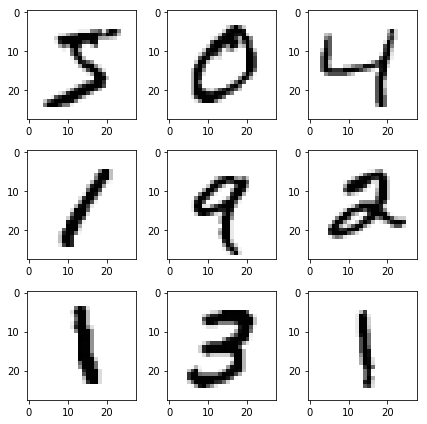

In [7]:
plt.figure(figsize=(6,6))
x, y = 3, 3
for i in range(x*y):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.gray_r, interpolation='nearest')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [8]:
# Scale X
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


# Labels one-hot encoding
from tensorflow.keras.utils import to_categorical

n_classes = 10

y_train_hot = to_categorical(y_train, n_classes)
y_test_hot = to_categorical(y_test, n_classes)

# Fully-connected NN

Consider the following NN with one hidden layer:

<center><img src='img/mnist_2layers.png'></center>

It has 28x28=784 inputs and 10 output neurons. We will use [Keras](https://keras.io) library to implement this network. But firstly we need to transform 28x28 images into vectors of 784 pixels:

In [9]:
X_train_nn = X_train.reshape((n_train, -1, ))
X_test_nn = X_test.reshape((n_test, -1, ))

print('X_train:    ', X_train.shape)
print('X_train_nn: ', X_train_nn.shape)

X_train:     (60000, 28, 28)
X_train_nn:  (60000, 784)


## Create and Fit NN Model

[Keras](https://keras.io)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Convolution2D, MaxPooling2D

from tensorflow.keras import backend as K
from tensorflow.keras import initializers

In [11]:
model = Sequential() # init NN model
model.add(Dense(units=15, input_dim=img_rows*img_cols, kernel_initializer=initializers.RandomNormal(), bias_initializer=initializers.Zeros(), activation='sigmoid')) # incert one hidden layer
model.add(Dense(n_classes, activation='softmax')) # incert output layer

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# Fit the model
model.fit(X_train_nn,
          y_train_hot,
          batch_size=32,
          nb_epoch=5,
          validation_data=(X_test_nn, y_test_hot),
          verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.8218 - accuracy: 0.8232 - val_loss: 0.4108 - val_accuracy: 0.9049
Epoch 2/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3524 - accuracy: 0.9102 - val_loss: 0.3002 - val_accuracy: 0.9209
Epoch 3/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2820 - accuracy: 0.9228 - val_loss: 0.2634 - val_accuracy: 0.9264
Epoch 4/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2501 - accuracy: 0.9297 - val_loss: 0.2407 - val_accuracy: 0.9325
Epoch 5/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2299 - accuracy: 0.9343 - val_loss: 0.2280 - val_accuracy: 0.9352


## Test the Model

In [13]:
y_test_pred_probas = model.predict_proba(X_test_nn)
y_test_pred_classes = model.predict_classes(X_test_nn)

In [14]:
# Predicted probas for 2 images
y_test_pred_probas[:2]

array([[6.8966081e-05, 7.2436400e-05, 5.6281094e-03, 1.2271790e-02,
        9.5623573e-06, 9.0406288e-04, 5.6775190e-07, 9.7928166e-01,
        2.0547275e-04, 1.5573653e-03],
       [2.2778818e-03, 2.6913020e-03, 9.8319095e-01, 3.4498668e-03,
        3.6027132e-06, 1.2391252e-03, 2.7664155e-03, 7.8349738e-05,
        4.2891437e-03, 1.3300636e-05]], dtype=float32)

In [15]:
# Predicted classes for 10 images
y_test_pred_classes[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [16]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_test_pred_classes)
print("Test accuracy: ", acc)

Test accuracy:  0.9352


---

# Convolutional NN

Consider a CNN model with structure similar to this:
<center><img src='img/network.png'></center>


Where convolution is:
<center><img src='img/convolution.jpg' width="400"></center>

And pooling is:
<center><img src='img/pooling2.png' width="400"></center>

The model has 28x28x1 inputs and 10 output neurons. We will use [Keras](https://keras.io) library to implement this network. But firstly we need to transform 28x28 images into array of (28 x 28 x 1) pixels:

In [17]:
X_train.shape

(60000, 28, 28)

In [18]:
if K.image_data_format() != 'channels_last':
    shape_ord = (1, img_rows, img_cols)
else:
    shape_ord = (img_rows, img_cols, 1)

In [19]:
X_train_cnn = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test_cnn = X_test.reshape((X_test.shape[0],) + shape_ord)

print('X_train:    ', X_train.shape)
print('X_train_cnn: ', X_train_cnn.shape)

X_train:     (60000, 28, 28)
X_train_cnn:  (60000, 28, 28, 1)


## Create and Fit NN Model

[Keras](https://keras.io)

In [20]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Convolution2D, MaxPooling2D
n_filters = 10 # number of convolutional filters
n_conv = 3 # filters size (n_conv x n_conv)
n_pool = 2 # pool size (n_pool x n_pool)

# Create CNN model
model = Sequential()

# Add convolutional and pooling layers
model.add(Convolution2D(n_filters, n_conv, padding='valid', input_shape=shape_ord, activation='relu'))
model.add(MaxPooling2D(pool_size=(n_pool, n_pool)))
model.add(Dropout(0.25))

model.add(Convolution2D(n_filters, n_conv, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(n_pool, n_pool)))
model.add(Dropout(0.25))

# Flatten arrays into vectors before fully-connected layers: (X, Y, Z) -> (XYZ, )
model.add(Flatten())

# Add fully-connected layers
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 10)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 10)        910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 250)              

In [21]:
model.fit(X_train_cnn,
          y_train_hot,
          batch_size=32,
          nb_epoch=5,
          validation_data=(X_test_cnn, y_test_hot),
          verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 189us/sample - loss: 1.1339 - accuracy: 0.5855 - val_loss: 0.2597 - val_accuracy: 0.9504
Epoch 2/5
60000/60000 [==============================] - 10s 159us/sample - loss: 0.7635 - accuracy: 0.7170 - val_loss: 0.1770 - val_accuracy: 0.9616
Epoch 3/5
60000/60000 [==============================] - 9s 157us/sample - loss: 0.6849 - accuracy: 0.7487 - val_loss: 0.1590 - val_accuracy: 0.9661
Epoch 4/5
60000/60000 [==============================] - 10s 172us/sample - loss: 0.6497 - accuracy: 0.7637 - val_loss: 0.1367 - val_accuracy: 0.9679
Epoch 5/5
60000/60000 [==============================] - 11s 178us/sample - loss: 0.6280 - accuracy: 0.7727 - val_loss: 0.1249 - val_accuracy: 0.9726


## Test the Model

In [22]:
y_test_pred_probas = model.predict_proba(X_test_cnn)
y_test_pred_classes = model.predict_classes(X_test_cnn)

In [23]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_test_pred_classes)
print("Test accuracy: ", acc)

Test accuracy:  0.9726


## Transfer learning

### Download Dataset

In [24]:
import cv2
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
img_width, img_height = 256, 256
batch_size = 64
epochs = 100
num_classes = 2

In [26]:
images = []
labels = []

for image_path in glob.glob('./hot-dog-not-hot-dog/*/*hot_dog/*.jpg'):
    try:
        image = cv2.imread(image_path)
        image = cv2.resize(image, (img_width, img_height))
            
        images.append(image)
        if '/hot_dog' in image_path:
            labels.append(1)
        if '/not_hot_dog' in image_path:
            labels.append(0)
    except Exception as e:
        print(e)

In [27]:
images = np.array(images).astype(np.float32) / 255.0
labels = np.array(labels).astype(np.float32)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.33, random_state=42)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [29]:
datagen = ImageDataGenerator(
    horizontal_flip = True,
    fill_mode = "nearest",
    zoom_range = 0.3,
    width_shift_range = 0.3,
    height_shift_range=0.3,
    rotation_range=30
)

### Download model

In [30]:
from tensorflow.keras import applications

In [31]:
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))

In [32]:
#not fit all layers
for layer in model.layers[:5]:
    layer.trainable = False

### Create model

In [33]:
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(2, activation="softmax")(x)

In [34]:
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

In [35]:
model_final = Model(inputs = model.input, outputs = predictions)

model_final.compile(loss = "categorical_crossentropy", 
                    optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), 
                    metrics=["accuracy"])

In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [37]:
checkpoint = ModelCheckpoint("vgg19_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

In [38]:
FIT = False
# don't fit now, becuase it is quite long

In [39]:
if FIT:
    model_final.fit(datagen.flow(X_train, y_train,
                                 batch_size=batch_size),
                          epochs=epochs,
                          steps_per_epoch=32,
                          validation_data=(X_test, y_test),
                          workers=4,
                          callbacks = [checkpoint, early])